# Project

# Final Project - Analyzing Sales Data

**Date**: 6 January 2022

**Author**: Chanyanart KiattipornOpas

**Course**: 'Pandas Foundation'

**Publish DataLore**: https://datalore.jetbrains.com/view/notebook/6Ajd7GdBq25EGV00wVpKT8

In [ ]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [ ]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# shape of dataframe
df.shape

(9994, 21)

In [ ]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [ ]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')

0   2019-11-08
1   2019-11-08
2   2019-06-12
3   2018-10-11
4   2018-10-11
Name: Order Date, dtype: datetime64[ns]

In [ ]:
# TODO - convert order date and ship date to datetime in the original dataframe
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# TODO - count nan in postal code column
print( "Total NaN on Postal Code column: ", df['Postal Code'].isnull().sum() )

Total NaN on Postal Code column:  11


In [ ]:
# TODO - filter rows with missing values
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [ ]:
# TODO - Explore this dataset on your owns, ask your own questions

In [ ]:
# To look at Start and End date of this trannsaction (from 'Order Date' column)
print("Earliest date:", df['Order Date'].min() )
print("Lastest Date:", df['Order Date'].max() )

Earliest date: 2017-01-03 00:00:00
Lastest Date: 2020-12-30 00:00:00


In [ ]:
# How many Transaction days in this dataset? 
date_count = df['Order Date'].unique()
print("There are", len(date_count), "transaction days in this dataset." )

There are 1236 transaction days in this dataset.


In [ ]:
# To create new column of 'Year' from 'Order Date' 
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df[['Order Date', 'year']].sample(5)

,Order Date,year
1819,2017-05-25,2017
6821,2020-12-28,2020
3328,2017-11-11,2017
7309,2020-06-10,2020
204,2020-06-03,2020


In [ ]:
# How many customer in this dataset ? 
customer = df[[ 'Customer ID', 'Customer Name']].value_counts().reset_index()
print("There are", len(customer), "customers in this dataset.")

There are 793 customers in this dataset.


In [ ]:
# Top5 customer who has transaction the most. "Loyal Customer"
customer.columns = ['Customer ID', 'Customer Name', 'Number of Transaction']
customer.head(5)

,Customer ID,Customer Name,Number of Transaction
0,WB-21850,William Brown,37
1,MA-17560,Matt Abelman,34
2,JL-15835,John Lee,34
3,PP-18955,Paul Prost,34
4,CK-12205,Chloris Kastensmidt,32


In [ ]:
# Who is our Top Spender ? 
df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending = False).reset_index().head(5)

,Customer ID,Customer Name,Sales
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571


In [ ]:
# Top 5 Cities where has transaction the most 
top_state = df[[ 'City', 'State']].value_counts().reset_index().head(5)
top_state.columns = ['City', 'State', 'Number of Transaction']
top_state

,City,State,Number of Transaction
0,New York City,New York,915
1,Los Angeles,California,747
2,Philadelphia,Pennsylvania,537
3,San Francisco,California,510
4,Seattle,Washington,428


In [ ]:
# Top Spender Cities 
df.groupby(['City', 'State'])['Sales'].sum().sort_values(ascending = False).reset_index().head(5)

,City,State,Sales
0,New York City,New York,256368.161
1,Los Angeles,California,175851.341
2,Seattle,Washington,119540.742
3,San Francisco,California,112669.092
4,Philadelphia,Pennsylvania,109077.013


In [ ]:
# Total Sale by Category
df.groupby(['Category', 'Sub-Category'])['Sales'].agg(['sum','mean', 'std']).style.background_gradient()

In [ ]:
# Profit generate by Category 
byProfit = df.groupby(['Category', 'Sub-Category'])['Profit'].agg(['sum'])
byProfit.style.background_gradient()

In [ ]:
# Which Category need to be considered?

byProfit[ byProfit ['sum'] < 0 ]
# Comment: Tables, Bookcases and Supplies should be considered because they can't generate any profit. 

sum
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Tables       -17725.4811
Office Supplies Supplies      -1189.0995

In [ ]:
# Which Category generate the highest profit? 
byProfit.sort_values('sum', ascending=False).head(5)

# Comment: Copiers is the category that generate highest profit. 

sum
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
Office Supplies Paper         34053.5693
                Binders       30221.7633

## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [ ]:
# TODO 01 - how many columns, rows in this dataset
print("Number of rows and columns are", df.shape)

Number of rows and columns are (9994, 22)


In [ ]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
showNaN = df.isnull().sum()
showNaN[showNaN > 0]

Postal Code    11
dtype: int64

In [ ]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
calfornia_data = df[ df['State'] == 'California' ]
calfornia_data.to_csv('california.csv', index=False)

In [ ]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file

In [ ]:
# Filter only Texas and California State
by_state = df[ (df['State'] == 'California') | (df['State'] == 'Texas')]

In [ ]:
# Filter only Year 2017 (between 2017-01-01 to 2017-12-31)
target_year_state = by_state[ (by_state['year'] == 2017) ]
target_year_state.sort_values('Order Date').head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
7980,7981,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2017
5327,5328,CA-2017-130813,2017-01-06,2017-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,90049.0,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312,2017
7660,7661,CA-2017-105417,2017-01-07,2017-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2017


In [ ]:
# Save to CSV 
target_year_state.to_csv('result.csv', index=False)

In [ ]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
year_2017 = df.query('year == 2017')

In [ ]:
print("Total Sales in 2017:", year_2017['Sales'].sum() )
print("Average Sales in 2017:", year_2017['Sales'].mean() )
print("Standard Deviation of Sales in 2017:", year_2017['Sales'].std() )

Total Sales in 2017: 484247.4981
Average Sales in 2017: 242.9741586051184
Standard Deviation of Sales in 2017: 754.0533572593688


In [ ]:
# TODO 06 - which Segment has the highest profit in 2018
year_2018 = df.query('year == 2018')
year_2018.groupby('Segment')['Profit'].sum()

# Comment: 'Consumer' Segment has the highest profit in 2018

Segment
Consumer       28460.1665
Corporate      20688.3248
Home Office    12470.1124
Name: Profit, dtype: float64

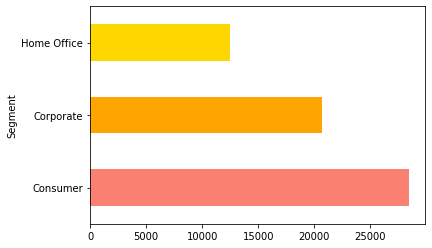

In [ ]:
year_2018.groupby('Segment')['Profit'].sum().plot(kind='barh', color=['salmon', 'orange', 'gold']);

In [ ]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019

In [ ]:
# Extract Sale time duration 
sale_between = df[ (df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31') ]
sale_between.sort_values('Order Date').head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
2252,2253,CA-2019-117849,2019-04-15,2019-04-17,Second Class,JK-16120,Julie Kriz,Home Office,United States,San Diego,California,92105.0,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,3,0.0,68.9760,2019
551,552,CA-2019-136406,2019-04-15,2019-04-17,Second Class,BD-11320,Bill Donatelli,Consumer,United States,San Francisco,California,94110.0,West,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,1121.568,2,0.2,0.0000,2019
432,433,US-2019-123750,2019-04-15,2019-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052.0,South,OFF-ST-10000617,Office Supplies,Storage,Woodgrain Magazine Files by Perma,4.768,2,0.2,-0.7748,2019


In [ ]:
# Total Sales on every States
total_sales = sale_between.groupby('State')['Sales'].sum().reset_index()

In [ ]:
# The 5 states which has the least Total Sales (between 15 April 2019 - 31 December 2019)
total_sales.sort_values('Sales').head(5)

,State,Sales
26,New Hampshire,49.05
28,New Mexico,64.08
7,District of Columbia,117.07
16,Louisiana,249.80
36,South Carolina,502.48


In [ ]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25% 

In [ ]:
year_2019 = df.query('year == 2019')

sale_byRegion = year_2019.groupby('Region')['Sales'].sum().reset_index()
sale_byRegion

,Region,Sales
0,Central,147429.3760
1,East,180685.8220
2,South,93610.2235
3,West,187480.1765


In [ ]:
# to find Total Sales in Year 2019
total_sales_year2019 = year_2019['Sales'].sum()
print("Total Sales in Year 2019:", total_sales_year2019)

Total Sales in Year 2019: 609205.598


In [ ]:
# To create Percent columns 
sale_byRegion['percent'] = (sale_byRegion['Sales'] / total_sales_year2019) * 100
sale_byRegion

,Region,Sales,percent
0,Central,147429.3760,24.200266
1,East,180685.8220,29.659252
2,South,93610.2235,15.365949
3,West,187480.1765,30.774533


In [ ]:
# The proportion of Total Sales in West + Central region in Year 2019 
target = sale_byRegion.iloc[[0,3]]
print("The proportion of Sales in West + Central (2019): ", target['percent'].sum() )

The proportion of Sales in West + Central (2019):  54.974798918377644


In [ ]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
year_19_20 = df.query('year == 2019 | year == 2020')

In [ ]:
# Top 10 popular products in number of Order (top10_byOrder)
top10_byOrder = year_19_20.groupby( [ 'Sub-Category', 'Product Name'] )['Quantity', 'Sales']\
                    .sum().reset_index()\
                    .sort_values('Quantity',ascending=False)\
                    .head(10)
top10_byOrder

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Sub-Category,Product Name,Quantity,Sales
795,Fasteners,Staples,124,462.068
1114,Paper,Easy-staple paper,89,1481.728
759,Envelopes,Staple envelope,73,644.936
369,Art,Staples in misc. colors,60,357.164
1717,Tables,Chromcraft Round Conference Tables,59,7965.053
545,Binders,Storex Dura Pro Binders,49,176.418
713,Chairs,"Situations Contoured Folding Chairs, 4/Set",47,2612.064
559,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,44,178.060
418,Binders,Avery Non-Stick Binders,43,122.128
886,Furnishings,Eldon Wave Desk Accessories,42,215.924


In [ ]:
# Top 10 of highest total Sale product 
top10_bySales = year_19_20.groupby( [ 'Sub-Category', 'Product Name'] )['Quantity', 'Sales']\
                    .sum().reset_index()\
                    .sort_values('Sales',ascending=False).head(10)

top10_bySales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Sub-Category,Product Name,Quantity,Sales
720,Copiers,Canon imageCLASS 2200 Advanced Copier,20,61599.824
723,Copiers,Hewlett Packard LaserJet 3310 Copier,31,16079.732
1045,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",11,14299.890
467,Binders,GBC Ibimaster 500 Manual ProClick Binding System,31,13621.542
465,Binders,GBC DocuBind TL300 Electric Binding System,21,12737.258
462,Binders,GBC DocuBind P400 Electric Binding System,16,12521.108
1491,Phones,Samsung Galaxy Mega 6.3,34,12263.708
667,Chairs,HON 5400 Series Task Chairs for Big and Tall,21,11846.562
1680,Supplies,Martin Yale Chadless Opener Electric Letter Op...,16,11825.902
662,Chairs,Global Troy Executive Leather Low-Back Tilter,25,10169.894


In [ ]:
# To count the highest order by Category
df.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(10)

,Sub-Category,Quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158
2,Art,3000
0,Accessories,2976
5,Chairs,2356
1,Appliances,1729
10,Labels,1400


In [ ]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)

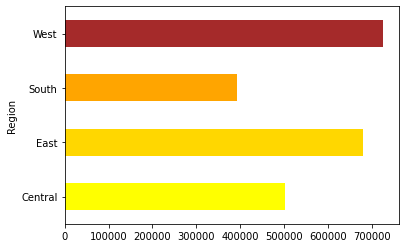

In [ ]:
# Total Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='barh', color=['yellow', 'gold', 'orange', 'brown']);

# Comment: It is clearly seen that 'West' region got the highest Sale among regions. 

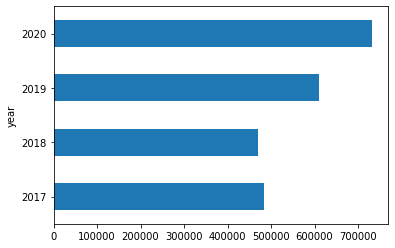

In [ ]:
# Total Sales by Year
df.groupby('year')['Sales'].sum().plot(kind='barh');

# Comment: Year 2020 is the peak Sale year. 

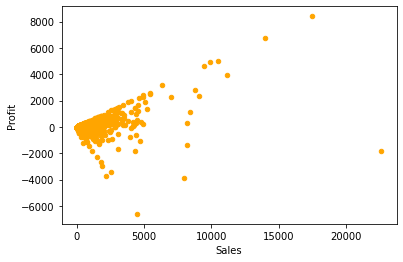

In [ ]:
# The More you Sales, The More You Gain (Profit) ? 
df[['Sales', 'Profit']]\
    .plot(x='Sales', y='Profit', kind='scatter', color='orange');

# Comment: Most transaction are around 0 - 5000. There are a trends both gaining and losing the profit. 

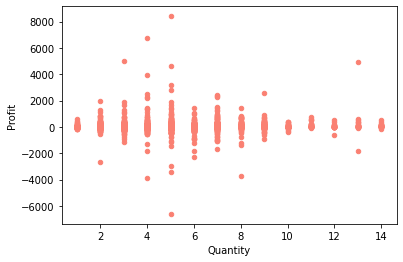

In [ ]:
# The High number of ordering products(per transaction), The High profit ? , Is that true?
df[['Quantity', 'Profit']]\
    .plot(x='Quantity', y='Profit', kind='scatter', color='salmon');

# Comment: It look like not true. "Wholesale" (more than 10 pieces) does not gain high profit. Comparing the transaction that ordering between 2 - 8 pieces. (Retail) There are a larger range of gaining profit. 

In [ ]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions
import numpy as np

In [ ]:
# If profit more than 0, it means that transaction got the profit. 
df['Sale status'] = np.where(df['Profit'] > 0, 'gain', 'loss')
df[['Profit', 'Sale status']].sample(5)

,Profit,Sale status
940,8.0464,gain
7323,10.9096,gain
9048,22.2000,gain
5920,217.7670,gain
4216,4.4352,gain


In [ ]:
# Segmentation 

In [ ]:
# How long does it take of preparing the parcel? 
# To create new column of preparing product. 
df['prepare_product'] = (df['Ship Date'] - df['Order Date']).dt.days
df[['Ship Date', 'Order Date', 'prepare_product']].head(3)

,Ship Date,Order Date,prepare_product
0,2019-11-11,2019-11-08,3
1,2019-11-11,2019-11-08,3
2,2019-06-16,2019-06-12,4


In [ ]:
df['prepare_product'].describe()

count    9994.000000
mean        3.958975
std         1.748902
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: prepare_product, dtype: float64

In [ ]:
# If prepare the product more than 5 days means 'slow' and less than 3 day is 'fast'

# Create function
def transform_prepare_parcel(_prepareday): 
    if _prepareday < 3:
        return "Fast"
    elif _prepareday > 5:
        return "Slow"
    else:
        return "Normal"

In [ ]:
# Apply function
df['prepare_status'] = df['prepare_product'].apply(transform_prepare_parcel)

In [ ]:
df[['prepare_product', 'prepare_status']].sample(5)

,prepare_product,prepare_status
8807,5,Normal
2058,3,Normal
1685,3,Normal
3600,4,Normal
4252,0,Fast


In [ ]:
df.groupby( ['Category'] )['prepare_status'].value_counts()

Category         prepare_status
Furniture        Normal            1252
                 Fast               503
                 Slow               366
Office Supplies  Normal            3593
                 Fast              1298
                 Slow              1135
Technology       Normal            1097
                 Fast               423
                 Slow               327
Name: prepare_status, dtype: int64